## P44 Data Understanding & EDA

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set()

In [2]:
pd.set_option('display.max_rows', 5000)

In [3]:
data = pd.read_excel("Retail-Ecommerce.xlsx")

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
print("Datafile starts with timepoint {}".format(data.InvoiceDate.min()))
print("Datafile ends with timepoint {}".format(data.InvoiceDate.max()))

Datafile starts with timepoint 2010-12-01 08:26:00
Datafile ends with timepoint 2011-12-09 12:50:00


In [7]:
data.shape

(541909, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# Missing values
#How many % of missing values do we have for each feature?
missing_percentage = data.isnull().sum() / data.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

#### #Almost 25 % of the customers are unknown!. In addition we have 0.26 % of missing descriptions

In [11]:
#Missing descriptions
data[data.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [12]:
data[data.Description.isnull()].CustomerID.isnull().value_counts()

True    1454
Name: CustomerID, dtype: int64

In [13]:
#Missing Customer IDs
data[data.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [14]:
data.loc[data.CustomerID.isnull(), ["UnitPrice", "Quantity"]].describe()

,UnitPrice,Quantity
count,135080.000000,135080.000000
mean,8.076577,1.995573
std,151.900816,66.696153
min,-11062.060000,-9600.000000
25%,1.630000,1.000000
50%,3.290000,1.000000
75%,5.450000,3.000000
max,17836.460000,5568.000000


#### The price and the quantities of entries without a customer ID can show extreme outliers. advice for the retailer is to setup strategies for transactions that are somehow faulty or special.

In [15]:
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [16]:
uk = data [data['Country'] == 'United Kingdom']

In [17]:
uk.shape

(495478, 8)

In [18]:
data['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
15039.0    1508
14156.0    1420
18118.0    1284
14159.0    1212
14796.0    1165
15005.0    1160
16033.0    1152
14056.0    1128
14769.0    1094
17511.0    1076
13081.0    1061
14527.0    1011
16549.0     981
14456.0     977
15719.0     938
15555.0     925
16931.0     898
17811.0     872
14505.0     803
12415.0     778
17338.0     757
18283.0     756
17757.0     742
12921.0     741
17675.0     721
15159.0     720
16764.0     718
16904.0     710
13137.0     705
15547.0     702
16923.0     696
17920.0     696
17735.0     690
15529.0     674
16360.0     671
16729.0     668
16241.0     662
15856.0     653
12681.0     646
13969.0     633
16713.0     632
14502.0     631
14415.0     612
13230.0     612
13098.0     605
14194.0     604
14088.0     590
16686.0     588
13694.0     585
17611.0     582
14667.0     576
17238.0     566
17602.0 

In [19]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Checking out columns separately

In [20]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
ASSORTED COLOUR BIRD ORNAMENT          1501
SET OF 3 CAKE TINS PANTRY DESIGN       1473
PACK OF 72 RETROSPOT CAKE CASES        1385
LUNCH BAG  BLACK SKULL.                1350
NATURAL SLATE HEART CHALKBOARD         1280
POSTAGE                                1252
JUMBO BAG PINK POLKADOT                1251
HEART OF WICKER SMALL                  1237
JAM MAKING SET WITH JARS               1229
JUMBO STORAGE BAG SUKI                 1214
PAPER CHAIN KIT 50'S CHRISTMAS         1210
JUMBO SHOPPER VINTAGE RED PAISLEY      1202
LUNCH BAG CARS BLUE                    1197
LUNCH BAG SPACEBOY DESIGN              1192
JAM MAKING SET PRINTED                 1182
RECIPE BOX PANTRY YELLOW DESIGN        1180
SPOTTY BUNTING                         1172
LUNCH BAG SUKI DESIGN           

#### Barchart for top 15 items

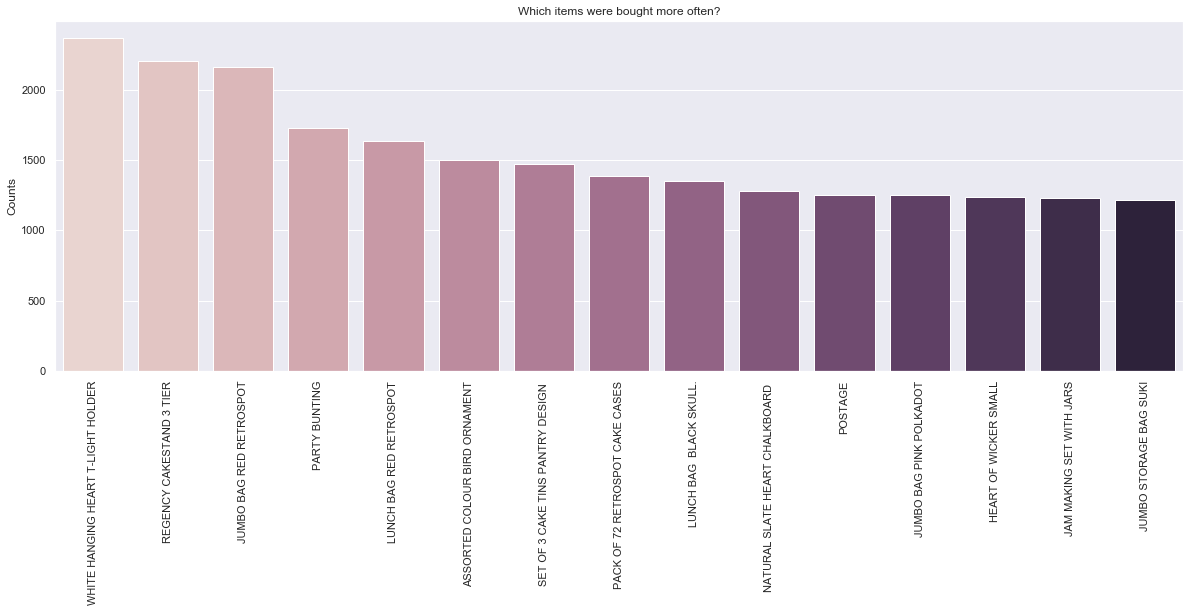

In [21]:
item_counts = data['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [22]:
data['Description'].value_counts().tail()

wrongly coded 23343                1
incorrectly put back into stock    1
?sold as sets?                     1
BREAD BIN, DINER STYLE, IVORY      1
re dotcom quick fix.               1
Name: Description, dtype: int64

In [23]:
data['StockCode'].value_counts()

85123A          2313
22423           2203
85099B          2159
47566           1727
20725           1639
84879           1502
22720           1477
22197           1476
21212           1385
20727           1350
22383           1348
22457           1280
23203           1267
POST            1256
22386           1251
22469           1239
22960           1229
21931           1214
22086           1210
22411           1202
20728           1197
22382           1192
22961           1182
22666           1180
23298           1179
22699           1138
22384           1137
23209           1135
82482           1129
22993           1111
22727           1107
22697           1085
23206           1084
22178           1072
20724           1068
23084           1067
20726           1061
22726           1026
21080           1015
23199           1009
22139            993
22077            986
22138            974
21034            967
22470            963
85099C           960
84946            946
21790        

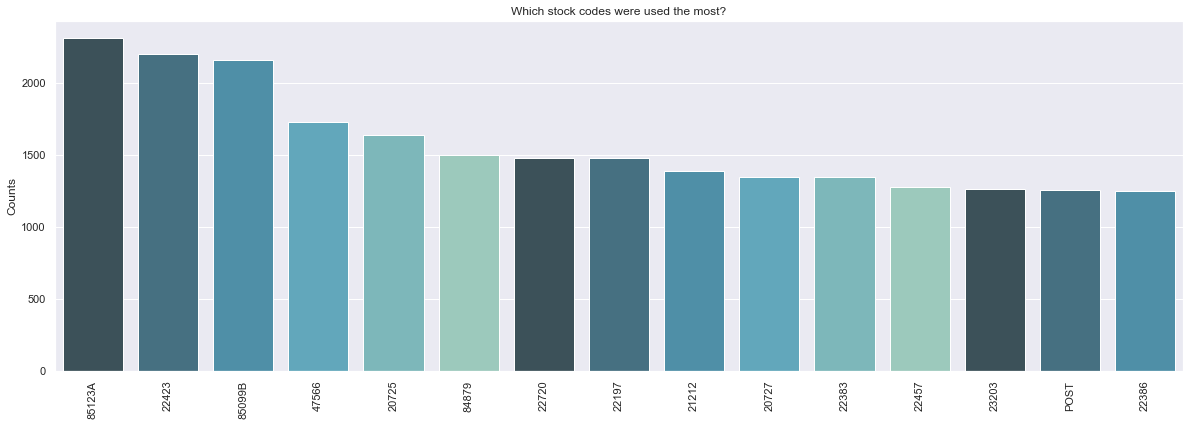

In [24]:
stock_counts = data['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(stock_counts.index, stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);

In [25]:
data['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C543918       1
546033        1
C563459       1
567800        1
570259        1
Name: InvoiceNo, Length: 25900, dtype: int64

#### Barchart for top 15 invoices having most items

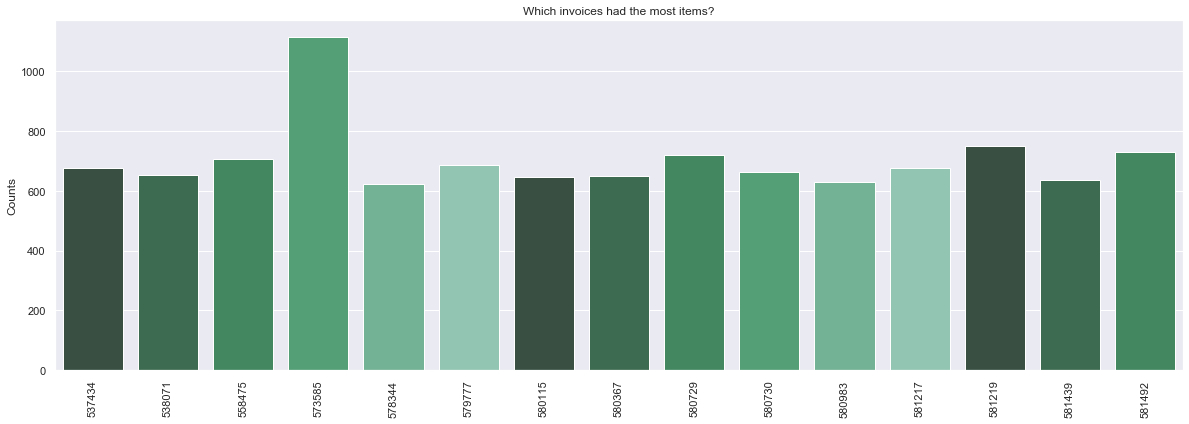

In [26]:
inv_counts = data['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(inv_counts.index, inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?");
plt.xticks(rotation=90);

In [27]:
data[data['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


#### negative quantity shows cancelled orders and represented by InvoiceNo starting with 'C' 

In [28]:
data=data[data['Quantity'] > 0]
data.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


#### We can see negative unit prices here

In [29]:
data[data['UnitPrice'] < 0].describe()

,Quantity,UnitPrice,CustomerID
count,2.0,2.00,0.0
mean,1.0,-11062.06,NaN
std,0.0,0.00,NaN
min,1.0,-11062.06,NaN
25%,1.0,-11062.06,NaN
50%,1.0,-11062.06,NaN
75%,1.0,-11062.06,NaN
max,1.0,-11062.06,NaN


In [30]:
data[data['UnitPrice'] == -11062.06]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [31]:
data = data[data['UnitPrice'] > 0]
data.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## Visual EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

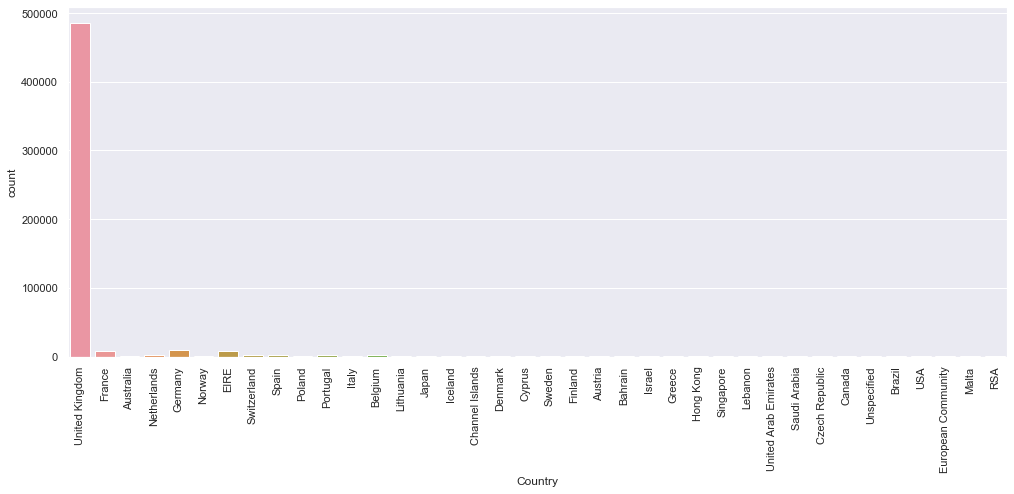

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data['Country'])
plt.xticks(rotation=90)

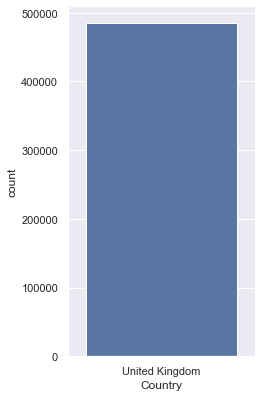

In [33]:
plt.figure(figsize=(3,6))
sns.countplot(data[data['Country'] == 'United Kingdom']['Country'])
#plt.xticks(rotation=90)

In [34]:
uk_count = data[data['Country'] == 'United Kingdom']['Country'].count()
all_count = data['Country'].count()
uk_perc = uk_count/all_count
print(str('{0:.2f}%').format(uk_perc*100))

91.51%


In [35]:
data['Sales'] = data ['Quantity'] * data ['UnitPrice'] 

### Detecting Outliers

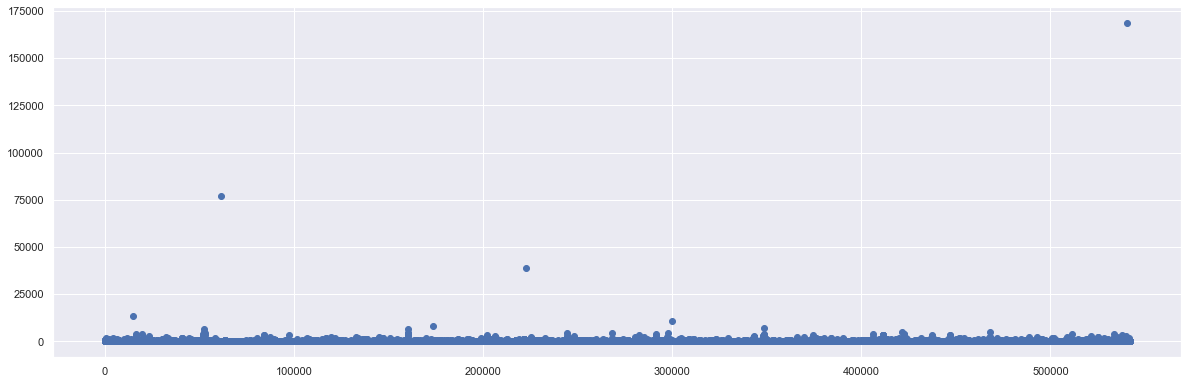

In [36]:
plt.figure(figsize=(18,6))
plt.scatter(x=data.index, y=data['Sales'])

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 <a list of 8 Text xticklabel objects>)

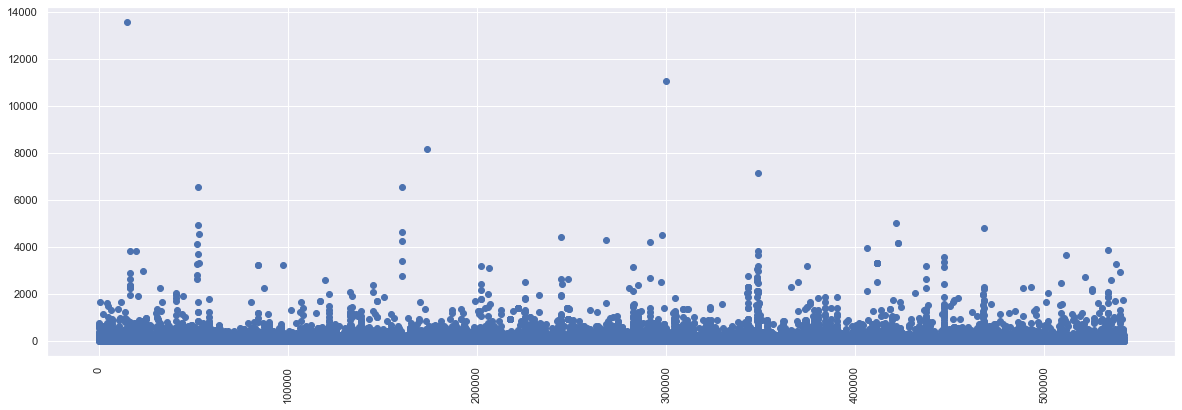

In [37]:
data = data[data['Sales'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=data.index, y=data['Sales'])
plt.xticks(rotation=90)

### DATA CLEANING

In [5]:
data.drop_duplicates(keep=False, inplace=True)

In [42]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2300
JUMBO BAG RED RETROSPOT                2106
REGENCY CAKESTAND 3 TIER               1997
PARTY BUNTING                          1692
LUNCH BAG RED RETROSPOT                1568
ASSORTED COLOUR BIRD ORNAMENT          1463
SET OF 3 CAKE TINS PANTRY DESIGN       1386
PACK OF 72 RETROSPOT CAKE CASES        1335
LUNCH BAG  BLACK SKULL.                1278
NATURAL SLATE HEART CHALKBOARD         1247
JUMBO BAG PINK POLKADOT                1226
HEART OF WICKER SMALL                  1212
JUMBO STORAGE BAG SUKI                 1191
PAPER CHAIN KIT 50'S CHRISTMAS         1170
JUMBO SHOPPER VINTAGE RED PAISLEY      1170
JAM MAKING SET PRINTED                 1159
LUNCH BAG CARS BLUE                    1150
SPOTTY BUNTING                         1150
LUNCH BAG SPACEBOY DESIGN              1149
POSTAGE                                1126
JAM MAKING SET WITH JARS               1125
RECIPE BOX PANTRY YELLOW DESIGN        1112
WOODEN PICTURE FRAME WHITE FINIS

In [43]:
remove_description = ['POSTAGE','DOTCOM POSTAGE','Bank Charges','AMAZON FEE','Next Day Carriage','PACKING CHARGE','Adjust bad debt']

In [44]:
data = data[~data['Description'].isin(remove_description)]

In [45]:
# Removing rows with unit price 0 or less and qauantity 0 or less. that implies to cancelled transactions
data_cleaned =  data[(data['UnitPrice']>0) & (data['Quantity']>0)]

In [46]:
data_cleaned.shape

(518093, 9)

In [47]:
data_cleaned.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,518093.000000,518093.000000,386660.000000,518093.000000
mean,10.419434,3.433871,15288.931330,19.347933
std,38.091027,17.660875,1710.628664,67.751010
min,1.000000,0.001000,12347.000000,0.001000
25%,1.000000,1.250000,13963.000000,4.130000
50%,4.000000,2.080000,15150.000000,9.950000
75%,12.000000,4.130000,16791.000000,17.700000
max,4800.000000,4287.630000,18287.000000,7144.720000


In [48]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518093 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    518093 non-null  object        
 1   StockCode    518093 non-null  object        
 2   Description  518093 non-null  object        
 3   Quantity     518093 non-null  int64         
 4   InvoiceDate  518093 non-null  datetime64[ns]
 5   UnitPrice    518093 non-null  float64       
 6   CustomerID   386660 non-null  float64       
 7   Country      518093 non-null  object        
 8   Sales        518093 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 39.5+ MB


In [49]:
high_value = data_cleaned[data_cleaned['UnitPrice']>1000]

In [50]:
high_value.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,23.0,23.000000,16.000000,23.000000
mean,1.0,2268.694783,13979.125000,2268.694783
std,0.0,1026.430653,1893.139927,1026.430653
min,1.0,1136.300000,12536.000000,1136.300000
25%,1.0,1445.445000,12744.000000,1445.445000
50%,1.0,2033.100000,12750.500000,2033.100000
75%,1.0,2618.855000,15058.750000,2618.855000
max,1.0,4287.630000,17940.000000,4287.630000


In [51]:
high_value.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
41448,539856,M,Manual,1,2010-12-22 14:41:00,1298.40,NaN,United Kingdom,1298.40
117054,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE,1687.17
117055,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE,1687.17
119632,546558,M,Manual,1,2011-03-15 09:50:00,2583.76,NaN,Hong Kong,2583.76
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore,2382.92


In [52]:
high_value['Description'].value_counts()

Manual    23
Name: Description, dtype: int64

In [53]:
Manual = data_cleaned[(data_cleaned['Description']=='Manual') & (data_cleaned['UnitPrice']>=1500)]

In [54]:
Manual

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
117054,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE,1687.17
117055,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE,1687.17
119632,546558,M,Manual,1,2011-03-15 09:50:00,2583.76,NaN,Hong Kong,2583.76
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore,2382.92
144829,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore,2053.07
150615,549468,M,Manual,1,2011-04-08 14:27:00,1867.86,17940.0,United Kingdom,1867.86
232891,557377,M,Manual,1,2011-06-20 11:00:00,1917.00,NaN,EIRE,1917.00
268028,560373,M,Manual,1,2011-07-18 12:30:00,4287.63,NaN,United Kingdom,4287.63
268432,560421,M,Manual,1,2011-07-18 15:13:00,1592.49,NaN,United Kingdom,1592.49
297438,562946,M,Manual,1,2011-08-11 09:38:00,2500.00,15581.0,United Kingdom,2500.00


In [6]:
data_cleaned['InvoiceNo'].value_counts()

NameError: name 'data_cleaned' is not defined

In [56]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518093 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    518093 non-null  object        
 1   StockCode    518093 non-null  object        
 2   Description  518093 non-null  object        
 3   Quantity     518093 non-null  int64         
 4   InvoiceDate  518093 non-null  datetime64[ns]
 5   UnitPrice    518093 non-null  float64       
 6   CustomerID   386660 non-null  float64       
 7   Country      518093 non-null  object        
 8   Sales        518093 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 39.5+ MB


In [57]:
#Dropping records with no customer id 
%%time
data_cleaned.dropna(inplace=True)

Wall time: 301 ms


In [58]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386660 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    386660 non-null  object        
 1   StockCode    386660 non-null  object        
 2   Description  386660 non-null  object        
 3   Quantity     386660 non-null  int64         
 4   InvoiceDate  386660 non-null  datetime64[ns]
 5   UnitPrice    386660 non-null  float64       
 6   CustomerID   386660 non-null  float64       
 7   Country      386660 non-null  object        
 8   Sales        386660 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 29.5+ MB


In [59]:
data_cleaned.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,386660.000000,386660.000000,386660.000000,386660.000000
mean,12.876134,3.018855,15288.931330,21.954595
std,43.329695,17.055536,1710.628664,73.234658
min,1.000000,0.001000,12347.000000,0.001000
25%,2.000000,1.250000,13963.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.480000
75%,12.000000,3.750000,16791.000000,19.800000
max,4800.000000,4161.060000,18287.000000,7144.720000


In [60]:
grouped_invoice = data_cleaned.groupby(['InvoiceNo','CustomerID','InvoiceDate','Country']).agg({'Quantity':'sum','Sales':'sum'})
grouped_invoice

,,,,Quantity,Sales
InvoiceNo,CustomerID,InvoiceDate,Country,,
536365,17850.0,2010-12-01 08:26:00,United Kingdom,40,139.12
536366,17850.0,2010-12-01 08:28:00,United Kingdom,12,22.20
536367,13047.0,2010-12-01 08:34:00,United Kingdom,83,278.73
536368,13047.0,2010-12-01 08:34:00,United Kingdom,15,70.05
536369,13047.0,2010-12-01 08:35:00,United Kingdom,3,17.85
...,...,...,...,...,...
581583,13777.0,2011-12-09 12:23:00,United Kingdom,76,124.60
581584,13777.0,2011-12-09 12:25:00,United Kingdom,120,140.64
581585,15804.0,2011-12-09 12:31:00,United Kingdom,278,329.05


In [61]:
grouped_invoice.reset_index(level=[0,1,2,3], inplace=True)

In [62]:
grouped_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18495 non-null  int64         
 1   CustomerID   18495 non-null  float64       
 2   InvoiceDate  18495 non-null  datetime64[ns]
 3   Country      18495 non-null  object        
 4   Quantity     18495 non-null  int64         
 5   Sales        18495 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 867.1+ KB


In [63]:
pd.set_option('display.max_rows', 500)

In [64]:
grouped_invoice.head(100)

,InvoiceNo,CustomerID,InvoiceDate,Country,Quantity,Sales
0,536365,17850.0,2010-12-01 08:26:00,United Kingdom,40,139.12
1,536366,17850.0,2010-12-01 08:28:00,United Kingdom,12,22.20
2,536367,13047.0,2010-12-01 08:34:00,United Kingdom,83,278.73
3,536368,13047.0,2010-12-01 08:34:00,United Kingdom,15,70.05
4,536369,13047.0,2010-12-01 08:35:00,United Kingdom,3,17.85
5,536370,12583.0,2010-12-01 08:45:00,France,446,801.86
6,536371,13748.0,2010-12-01 09:00:00,United Kingdom,80,204.00
7,536372,17850.0,2010-12-01 09:01:00,United Kingdom,12,22.20
8,536373,17850.0,2010-12-01 09:02:00,United Kingdom,88,259.86
9,536374,15100.0,2010-12-01 09:09:00,United Kingdom,32,350.40


In [65]:
grouped_invoice['Invoice_Month_year'] = grouped_invoice['InvoiceDate'].dt.strftime('%b-%Y')

In [66]:
grouped_invoice

,InvoiceNo,CustomerID,InvoiceDate,Country,Quantity,Sales,Invoice_Month_year
0,536365,17850.0,2010-12-01 08:26:00,United Kingdom,40,139.12,Dec-2010
1,536366,17850.0,2010-12-01 08:28:00,United Kingdom,12,22.20,Dec-2010
2,536367,13047.0,2010-12-01 08:34:00,United Kingdom,83,278.73,Dec-2010
3,536368,13047.0,2010-12-01 08:34:00,United Kingdom,15,70.05,Dec-2010
4,536369,13047.0,2010-12-01 08:35:00,United Kingdom,3,17.85,Dec-2010
...,...,...,...,...,...,...,...
18490,581583,13777.0,2011-12-09 12:23:00,United Kingdom,76,124.60,Dec-2011
18491,581584,13777.0,2011-12-09 12:25:00,United Kingdom,120,140.64,Dec-2011
18492,581585,15804.0,2011-12-09 12:31:00,United Kingdom,278,329.05,Dec-2011
18493,581586,13113.0,2011-12-09 12:49:00,United Kingdom,66,339.20,Dec-2011


In [67]:
grouped_invoice.describe()

,InvoiceNo,CustomerID,Quantity,Sales
count,18495.000000,18495.000000,18495.000000,18495.000000
mean,559501.806542,15270.174155,269.190916,458.986944
std,13044.301903,1732.642868,546.452569,940.558545
min,536365.000000,12347.000000,1.000000,0.380000
25%,548326.500000,13777.000000,74.000000,155.345000
50%,559768.000000,15184.000000,154.000000,301.290000
75%,570826.500000,16779.000000,288.000000,462.540000
max,581587.000000,18287.000000,15049.000000,31698.160000


In [68]:
grouped_invoice['Month'] = grouped_invoice['InvoiceDate'].dt.strftime('%b')
grouped_invoice['Hour'] = pd.DatetimeIndex(grouped_invoice['InvoiceDate']).hour

In [69]:
grouped_invoice

,InvoiceNo,CustomerID,InvoiceDate,Country,Quantity,Sales,Invoice_Month_year,Month,Hour
0,536365,17850.0,2010-12-01 08:26:00,United Kingdom,40,139.12,Dec-2010,Dec,8
1,536366,17850.0,2010-12-01 08:28:00,United Kingdom,12,22.20,Dec-2010,Dec,8
2,536367,13047.0,2010-12-01 08:34:00,United Kingdom,83,278.73,Dec-2010,Dec,8
3,536368,13047.0,2010-12-01 08:34:00,United Kingdom,15,70.05,Dec-2010,Dec,8
4,536369,13047.0,2010-12-01 08:35:00,United Kingdom,3,17.85,Dec-2010,Dec,8
...,...,...,...,...,...,...,...,...,...
18490,581583,13777.0,2011-12-09 12:23:00,United Kingdom,76,124.60,Dec-2011,Dec,12
18491,581584,13777.0,2011-12-09 12:25:00,United Kingdom,120,140.64,Dec-2011,Dec,12
18492,581585,15804.0,2011-12-09 12:31:00,United Kingdom,278,329.05,Dec-2011,Dec,12
18493,581586,13113.0,2011-12-09 12:49:00,United Kingdom,66,339.20,Dec-2011,Dec,12


In [70]:
month_of_purchase = grouped_invoice.groupby('CustomerID')['Month'].unique()

In [71]:
month_of_purchase = pd.DataFrame(month_of_purchase)

In [72]:
month_of_purchase.reset_index(level=[0], inplace=True)

In [73]:
month_of_purchase.set_index(['CustomerID'], inplace = True) 

In [74]:
month_of_purchase

,Month
CustomerID,
12347.0,"[Dec, Jan, Apr, Jun, Aug, Oct]"
12348.0,"[Dec, Jan, Apr, Sep]"
12349.0,[Nov]
12350.0,[Feb]
12352.0,"[Feb, Mar, Sep, Nov]"
...,...
18280.0,[Mar]
18281.0,[Jun]
18282.0,"[Aug, Dec]"


In [88]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
sales_month_df = pd.DataFrame(mlb.fit_transform(month_of_purchase['Month']),columns=mlb.classes_,index=month_of_purchase.index)
print (sales_month_df)


            Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
CustomerID                                                            
12347.0       1    1    1    0    1    0    1    0    0    0    1    0
12348.0       1    0    1    0    1    0    0    0    0    0    0    1
12349.0       0    0    0    0    0    0    0    0    0    1    0    0
12350.0       0    0    0    1    0    0    0    0    0    0    0    0
12352.0       0    0    0    1    0    0    0    1    0    1    0    1
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
18280.0       0    0    0    0    0    0    0    1    0    0    0    0
18281.0       0    0    0    0    0    0    1    0    0    0    0    0
18282.0       0    1    1    0    0    0    0    0    0    0    0    0
18283.0       1    0    1    1    1    1    1    0    1    1    1    1
18287.0       0    0    0    0    0    0    0    0    1    0    1    0

[4336 rows x 12 columns]


In [91]:
sales_month_df.reset_index(level=[0], inplace=True)

In [92]:
sales_month_df.head()

,CustomerID,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,12347.0,1,1,1,0,1,0,1,0,0,0,1,0
1,12348.0,1,0,1,0,1,0,0,0,0,0,0,1
2,12349.0,0,0,0,0,0,0,0,0,0,1,0,0
3,12350.0,0,0,0,1,0,0,0,0,0,0,0,0
4,12352.0,0,0,0,1,0,0,0,1,0,1,0,1


In [76]:
grouped_invoice['Month'].value_counts()

Nov    2651
Dec    2173
Oct    1919
Sep    1745
May    1555
Jun    1390
Jul    1327
Mar    1321
Aug    1273
Apr    1150
Feb    1001
Jan     990
Name: Month, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

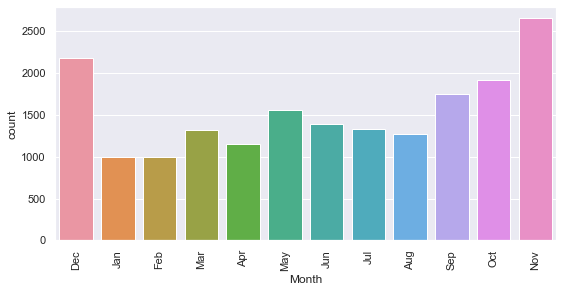

In [77]:
plt.figure(figsize=(8,4))
sns.countplot(grouped_invoice['Month'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

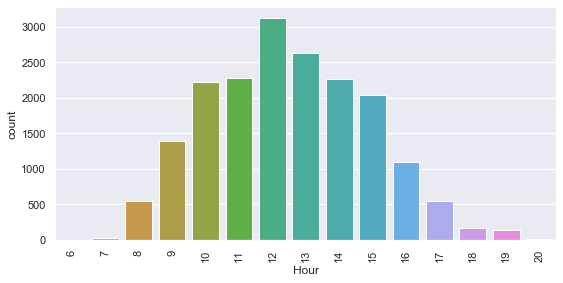

In [78]:
plt.figure(figsize=(8,4))
sns.countplot(grouped_invoice['Hour'])
plt.xticks(rotation=90)

In [93]:
#Top 10 customers - Sales

all_customer_sales  = grouped_invoice.groupby(['CustomerID']).agg({'Quantity':'sum','Sales':'sum'}).sort_values('Sales',ascending = False)
all_customer_sales.reset_index(level=[0], inplace=True)
all_customer_sales

,CustomerID,Quantity,Sales
0,14646.0,196844,279138.02
1,18102.0,64124,259657.30
2,17450.0,69953,194230.79
3,14911.0,80214,143589.78
4,12415.0,77373,124564.53
...,...,...,...
4331,17956.0,1,12.75
4332,16454.0,3,6.90
4333,14792.0,2,6.20
4334,16738.0,3,3.75


In [94]:
all_customer_sales_month = pd.merge(all_customer_sales,sales_month_df)

In [95]:
all_customer_sales_month

,CustomerID,Quantity,Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,14646.0,196844,279138.02,1,1,1,1,1,1,1,1,1,1,1,1
1,18102.0,64124,259657.30,1,1,1,1,0,1,1,1,1,1,1,1
2,17450.0,69953,194230.79,1,1,1,0,1,1,1,1,1,1,1,1
3,14911.0,80214,143589.78,1,1,1,1,1,1,1,1,1,1,1,1
4,12415.0,77373,124564.53,0,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,17956.0,1,12.75,1,0,0,0,0,0,0,0,0,0,0,0
4332,16454.0,3,6.90,0,0,0,0,0,0,0,0,0,0,1,0
4333,14792.0,2,6.20,0,0,0,0,0,0,0,0,0,0,1,0
4334,16738.0,3,3.75,0,0,0,1,0,0,0,0,0,0,0,0


In [80]:
top10_cust_sales  = all_customer_sales.head(2)
top10_cust_sales

,CustomerID,Quantity,Sales
0,14646.0,196844,279138.02
1,18102.0,64124,259657.30


In [81]:
top10_customer_sales_list = list(top10_cust_sales['CustomerID'])

In [82]:
top10_customer_sales_list

[14646.0, 18102.0]

In [83]:
top10_cust_sales_df  = grouped_invoice[grouped_invoice['CustomerID'].isin(top10_customer_sales_list)]

In [84]:
top10_cust_sales_df

,InvoiceNo,CustomerID,InvoiceDate,Country,Quantity,Sales,Invoice_Month_year,Month,Hour
562,537657,18102.0,2010-12-07 16:42:00,United Kingdom,2790,9639.12,Dec-2010,Dec,16
563,537658,18102.0,2010-12-07 16:43:00,United Kingdom,120,395.76,Dec-2010,Dec,16
564,537659,18102.0,2010-12-07 16:43:00,United Kingdom,3689,15885.49,Dec-2010,Dec,16
731,538063,18102.0,2010-12-09 13:44:00,United Kingdom,96,1914.24,Dec-2010,Dec,13
1294,539491,14646.0,2010-12-20 10:09:00,Netherlands,45,55.96,Dec-2010,Dec,10
1361,539731,14646.0,2010-12-21 15:05:00,Netherlands,6668,8520.92,Dec-2010,Dec,15
1814,541206,14646.0,2011-01-14 12:24:00,Netherlands,8210,10389.06,Jan-2011,Jan,12
1948,541570,14646.0,2011-01-19 12:34:00,Netherlands,6072,7722.04,Jan-2011,Jan,12
1968,541608,14646.0,2011-01-20 09:54:00,Netherlands,288,305.28,Jan-2011,Jan,9
2007,541711,14646.0,2011-01-21 11:18:00,Netherlands,5730,8060.30,Jan-2011,Jan,11


In [85]:
top10_cust_sales_df['CustomerID'].value_counts()

14646.0    72
18102.0    60
Name: CustomerID, dtype: int64

In [97]:
import datetime as dt

In [98]:
PRESENT = dt.datetime(2011,12,10)
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

In [100]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [102]:
# RFM Analysis - recency , frequency , monetary
rfm= data_cleaned.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda InvoiceNo: len(InvoiceNo),
                                        'Sales': lambda Sales: Sales.sum()})

In [103]:
rfm

,InvoiceDate,InvoiceNo,Sales
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,27,1437.24
12349.0,18,72,1457.55
12350.0,310,16,294.40
12352.0,36,80,2226.04
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [106]:
# Change the name of columns
rfm.columns=['recency','frequency','monetary']

In [107]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,27,1437.24
12349.0,18,72,1457.55
12350.0,310,16,294.40
12352.0,36,80,2226.04


In [110]:
#Computing Quantile of RFM values
#Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

#qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

In [109]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [111]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12347.0,2,182,4310.00,1,1,1,111
12348.0,75,27,1437.24,3,3,2,332
12349.0,18,72,1457.55,2,2,2,222
12350.0,310,16,294.40,4,4,4,444
12352.0,36,80,2226.04,2,2,1,221


In [112]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
14646.0,1,2060,279138.02,1,1,1,111
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,335,194230.79,1,1,1,111
14911.0,1,5664,143589.78,1,1,1,111
14156.0,9,1390,117040.53,1,1,1,111


(array([734138., 734197., 734258., 734319., 734381., 734442.]),
 <a list of 6 Text xticklabel objects>)

<Figure size 1296x288 with 0 Axes>

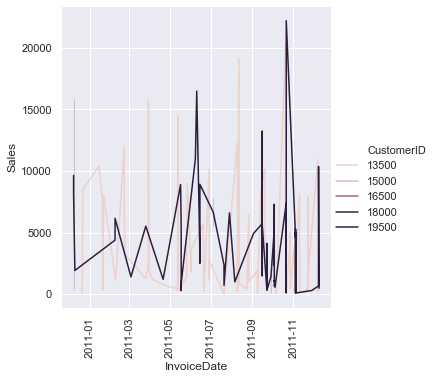

In [86]:
plt.figure(figsize=(18,4))
sns.relplot(x="InvoiceDate", y="Sales", hue="CustomerID",  kind="line", data=top10_cust_sales_df)  
plt.xticks(rotation=90)

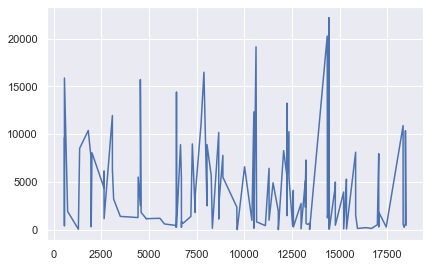

In [87]:
top10_cust_sales_df['Sales'].plot.line()